In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [62]:
data = pd.read_csv('tvmarketing.csv')

In [63]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [64]:
data.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [65]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [67]:
data.columns

Index(['TV', 'Sales'], dtype='object')

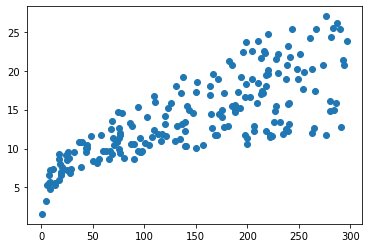

In [68]:
plt.scatter(data['TV'], data['Sales'])

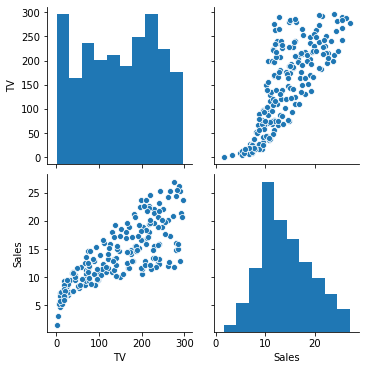

In [69]:
sns.pairplot(data)

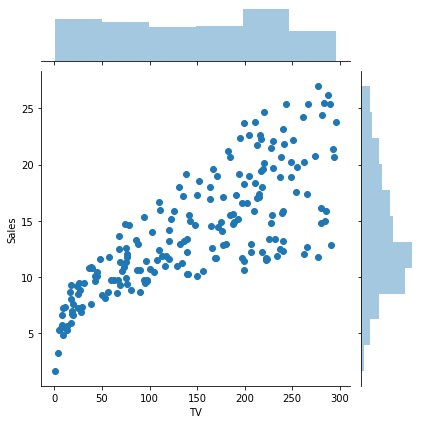

In [70]:
sns.jointplot(data['TV'], data['Sales'])

In [71]:
x = data['TV'].values.reshape(-1,1)
y = data['Sales']

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.4, random_state= 40)

In [73]:
nb = SVR()

In [74]:
nb.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
pred = nb.predict(xtest)

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))

MAE 2.6664794826416967
MSE 12.320037272078377
R2_SCORE 0.5647946464223769
RMSE 1.6329358476810094


In [78]:
Lr = LinearRegression()

In [79]:
Lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
pred = Lr.predict(xtest)

In [81]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))

MAE 2.404309380295121
MSE 9.835227705873374
R2_SCORE 0.6525705517992344
RMSE 1.5505835612101404


In [83]:
Dt = DecisionTreeRegressor()

In [84]:
Dt.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
pred = Dt.predict(xtest)

In [86]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))

MAE 3.62625
MSE 23.793062499999998
R2_SCORE 0.15950999584434467
RMSE 1.9042715142542044


In [91]:
Rf = RandomForestRegressor()

In [92]:
Rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
pred = Rf.predict(xtest)

In [95]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))


MAE 3.053574791666666
MSE 16.55231314166321
R2_SCORE 0.4152894886388745
RMSE 1.7474480798200174


In [97]:
Gr = GradientBoostingRegressor()

In [98]:
Gr.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [99]:
pred = Gr.predict(xtest)

In [100]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))

MAE 3.148964278676048
MSE 18.337170583718624
R2_SCORE 0.3522393941463976
RMSE 1.7745321295135932


In [102]:
Kn = KNeighborsRegressor()

In [1]:
Kn.fit(xtrain, ytrain)

NameError: name 'Kn' is not defined

In [105]:
pred = Kn.predict(xtest)

In [106]:
print("MAE",mean_absolute_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2_SCORE",r2_score(ytest,pred))
print("RMSE",np.sqrt(mean_absolute_error(ytest,pred)))

MAE 2.723
MSE 12.534110000000002
R2_SCORE 0.5572325266666516
RMSE 1.6501515081955354
